<h1>Vmesno poročilo</h1>

<h3>Glavni problem</h3>
Za projekt smo si izbrali analizirati vzroke in vzorce rasti prebivalca. To smo si izbrali vglavnem zato, ker velikokrat slišimo napačne komentare in ugotovitve. Dataset smo našli na uradni strani Združenih narodov, ker so podatki bili precej vredu strukturirani in nam je to omogočilo, da takoj gremo z zanimivejšim stvarem. Ta dataset se nam je tudi zdel zelo objektiven. Zaenkrat smo analizirali samo rast prebivalstva do danes. Kasneje pa bomo še za prihodnost.

Vir podatkov:
<a>https://esa.un.org</a>

In [1]:
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

<h2>Svetovna populacija skozi čas</h2>


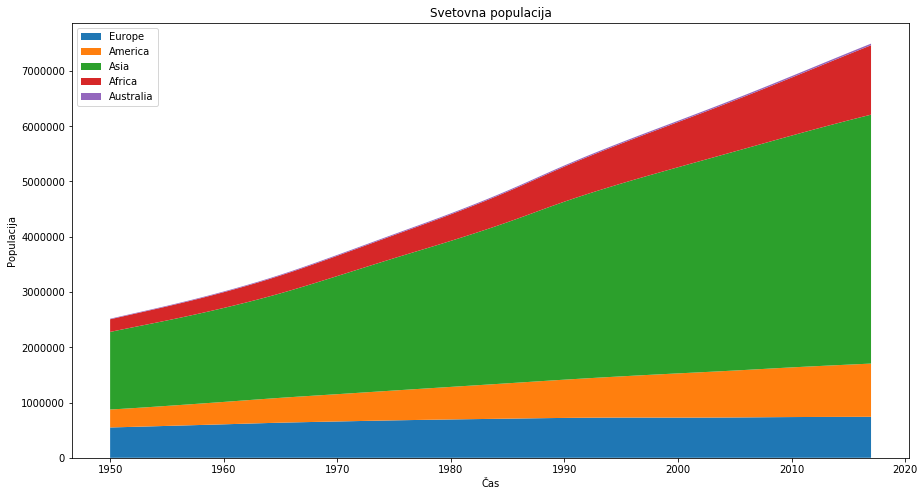

In [2]:
region = defaultdict()
def worldPopulationVisualisation(filename):
    dictionary = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        population = row["PopTotal"]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary[(time, "Europe")] = float(population)
            elif "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == row["Location"]:
                if (time,"America") not in dictionary:
                   dictionary[(time, "America")] = float(population)
                else:
                    dictionary[(time, "America")] += float(population)
            elif "Asia" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Africa" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Australia/New Zealand" == row["Location"]:
                dictionary[(time, country)] = float(population)
    europe = []
    america = []
    asia = []
    africa = []
    australia = []
    continents = ["Europe", "America", "Asia", "Africa", "Australia/New Zealand"]
    yearsRange = range(1950, 2018)  #interval is adjustable(1950-2100)
    for continent in continents:
        for i in yearsRange:
            if continent == "Europe": europe.append(dictionary[(str(i), continent)])
            elif continent == "America": america.append(dictionary[(str(i), continent)])
            elif continent == "Asia": asia.append(dictionary[(str(i), continent)])
            elif continent == "Africa": africa.append(dictionary[(str(i), continent)])
            elif continent == "Australia/New Zealand": australia.append(dictionary[(str(i), continent)])
    x = yearsRange
    plt.figure(figsize=(15,8))
    plt.stackplot(x, europe, america, asia, africa, australia, labels=['Europe', 'America', "Asia", "Africa", "Australia"])
    plt.legend(loc='upper left')
    plt.title("Svetovna populacija")
    plt.xlabel("Čas")
    plt.ylabel("Populacija")
    plt.show()

worldPopulationVisualisation("WPP2017_TotalPopulationBySex.csv")

<h2>Število rojstev glede na celino</h2>
Povprečno število rojenih otrok na matero na neki celini.

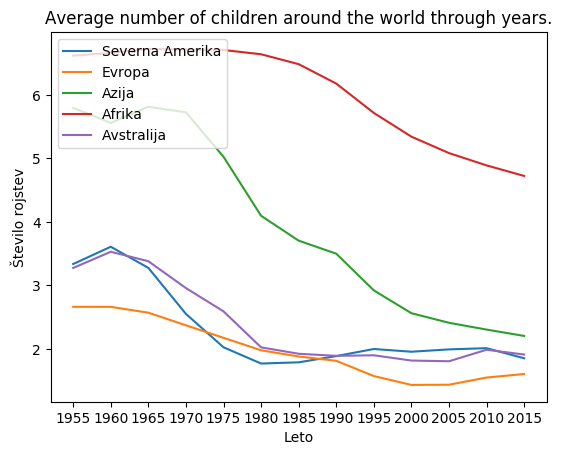

In [75]:
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

filename = "WPP2017_Period_Indicators_Medium.csv"

#-----Tukaj vstavi argument-------
argument = "TFR"
#---------------------------------

region = defaultdict()
def readData(filename):
    dictionary = defaultdict(list)
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        births = row[argument]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary["Europe"].append(float(births))
            elif "Northern America" == row["Location"]:
                dictionary["Northern America"].append(float(births))
            elif "Southern America" == row["Location"]:
                dictionary["Southern America"].append(float(births))
            elif "Asia" == row["Location"]:
                dictionary["Asia"].append(float(births))
            elif "Africa" == row["Location"]:
                dictionary["Africa"].append(float(births))
            elif "Australia/New Zealand" == row["Location"]:
                dictionary["Australia"].append(float(births))
    return dictionary

region = readData(filename)
time_periods = list(range(1955,2016,5))

x = np.array(range(13))
plt.xticks(x, time_periods)

plt.plot(x, np.array(region["Northern America"][:13]), label='Severna Amerika')
plt.plot(x, np.array(region["Europe"][:13]), label='Evropa')
#ax.plot(x, np.array(region["Southern America"][:13]), label='Južna Amerika')
plt.plot(x, np.array(region["Asia"][:13]), label='Azija')
plt.plot(x, np.array(region["Africa"][:13]), label='Afrika')
plt.plot(x, np.array(region["Australia"][:13]), label='Avstralija')

plt.xlabel("Leto")
plt.ylabel("Število rojstev")
plt.title("Average number of children around the world through years.")

plt.legend(loc='upper left')

plt.show()

<h2>Demografske piramide</h2>

In [4]:
def ageGroupVisualisation(filename, year, continent):
    dictionaryM = dict()
    dictionaryF = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        time = row["Time"]
        populationM = row["PopMale"]
        populationF = row["PopFemale"]
        age = row["AgeGrp"]
        if row["VarID"] == "2" and time == str(year):
            if continent == "America":
                if "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == \
                        row["Location"]:
                    if age not in dictionaryM:
                        dictionaryM[age] = float(populationM)
                    else:
                        dictionaryM[age] += float(populationM)
                    if age not in dictionaryF:
                        dictionaryF[age] = float(populationF)
                    else:
                        dictionaryF[age] += float(populationF)
            elif continent == row["Location"]:
                dictionaryM[age] = float(populationM)
                dictionaryF[age] = float(populationF)
    labels = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", "95-99", "100+"]
    populationM = []
    populationF = []
    for lb in labels:
        populationM.append(dictionaryM[lb])
        populationF.append(dictionaryF[lb])

    y = np.arange(len(populationM))
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(6, 5))
    axes[0].barh(y, populationM, align='center', color='blue', zorder=10)
    axes[0].set(title='Male population')
    axes[1].barh(y, populationF, align='center', color='purple', zorder=10)
    axes[1].set(title='Female population')

    axes[0].invert_xaxis()
    axes[0].set(yticks=y, yticklabels=labels)
    axes[0].yaxis.tick_right()

    for ax in axes.flat:
        ax.margins(0.03)
        ax.grid(True)

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.22)
    fig.suptitle(continent+" "+str(year))
    plt.show()

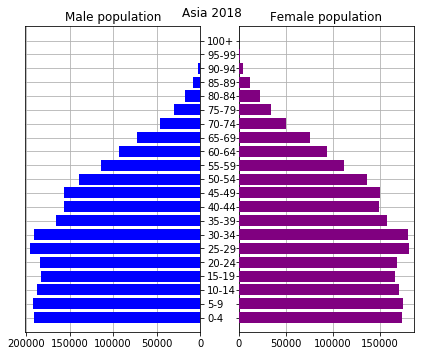

In [5]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "Asia")

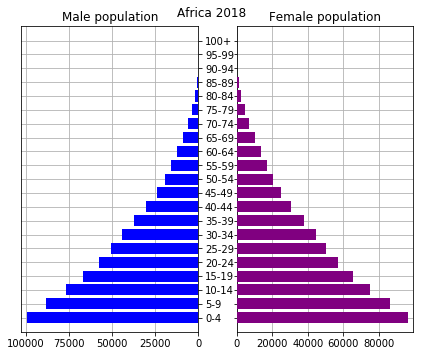

In [6]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "Africa")

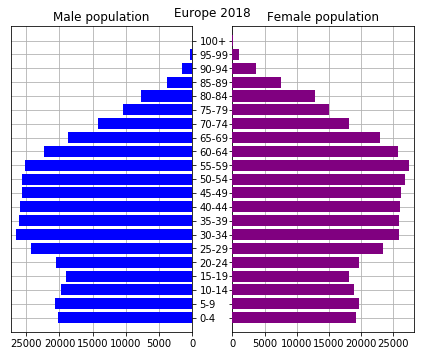

In [7]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "Europe")

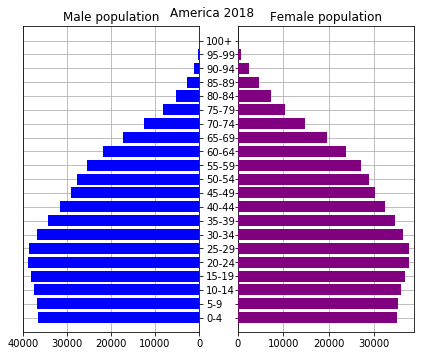

In [8]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "America")

<h2>GDP in število rojstev</h2>
Korelacija med GDP na prebivalca in številom živorojenih otrok na žensko, v državah po vsem svetu.

In [98]:
def birthsGDPCorrelation(filenameBirths, filenameGDP, year):
    dictionaryBirths = dict()
    reader = DictReader(open(filenameBirths, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = str(row["Time"])
        births = row["TFR"]
        timeInterval = time.split("-")
        if row["VarID"] == "2" and int(timeInterval[0]) <= year and int(timeInterval[1]) >= year:
            if(births != ""):
                dictionaryBirths[country] = float(births)

    dictionaryGDP = dict()
    reader = DictReader(open(filenameGDP, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Name"]
        GDP = row["GDPPC"]
        if country in dictionaryBirths:
            dictionaryGDP[country] = float(GDP)

    gdp = []
    births = []
    for key, value in dictionaryBirths.items():
        if key in dictionaryGDP:
            births.append(value)
            gdp.append((dictionaryGDP[key]))

    plt.rcdefaults()
    fit = np.polyfit(gdp, births, 1)
    fit_fn = np.poly1d(fit)
    plt.plot(gdp, births, 'go', gdp, fit_fn(gdp), '--k', ms=4)
    plt.xlim(0, max(gdp)+1)
    plt.ylim(0, max(births) + 1)
    plt.xlabel("GDP na osebo v dolarjih")
    plt.ylabel("Št. živorejenih otrok na žensko")
    plt.title("Povezava med GDP in rojstvi v letu "+ str(year))
    plt.show()

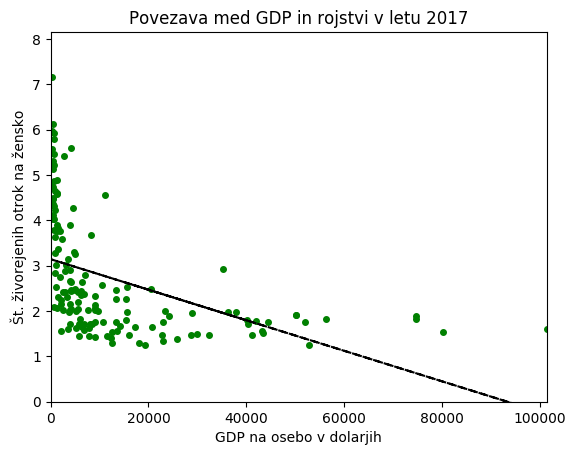

In [99]:
birthsGDPCorrelation("WPP2017_Period_Indicators_Medium.csv", "GDP.csv", 2017)

<h2>Vernost in število rojstev</h2>
Korelacija med procentom nevernih ljudi in številom živorojenih otrok na žensko, v državah po vsem svetu.

In [105]:
def religionBirthCorrelation(filenameBirths, filenameReligion, year):
    dictionaryBirths = dict()
    reader = DictReader(open(filenameBirths, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = str(row["Time"])
        births = row["TFR"]
        timeInterval = time.split("-")
        if row["VarID"] == "2" and int(timeInterval[0]) <= year and int(timeInterval[1]) >= year:
            if (births != ""):
                dictionaryBirths[country] = float(births)

    dictionaryReligion = dict()
    reader = DictReader(open(filenameReligion, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["country"]
        nonReligious = row["percentage_non_religious"]
        if country in dictionaryBirths:
            dictionaryReligion[country] = float(nonReligious)

    nonReligious = []
    births = []
    for key, value in dictionaryBirths.items():
        if key in dictionaryReligion:
            births.append(value)
            nonReligious.append((dictionaryReligion[key]))

    plt.rcdefaults()
    fit = np.polyfit(nonReligious, births, 1)
    fit_fn = np.poly1d(fit)
    plt.plot(nonReligious, births, 'go', nonReligious, fit_fn(nonReligious), '--k', ms=4)
    plt.xlim(0, max(nonReligious) + 1)
    plt.ylim(0, max(births) + 1)
    plt.xlabel("Delež nevernih ljudi")
    plt.ylabel("Št. živorejenih otrok na žensko")
    plt.title("Povezava med vernostjo in rojstvi v letu " + str(year))
    plt.show()

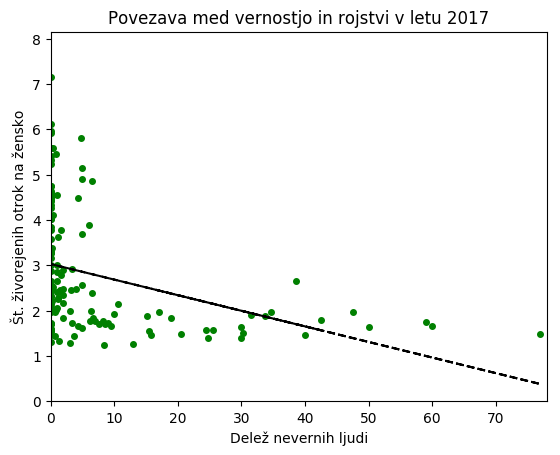

In [106]:
religionBirthCorrelation("WPP2017_Period_Indicators_Medium.csv", "religion.csv", 2017)

<h2>Migracije</h2>
Migracije v celinah - negativna izseljevanja in pozitivna priseljevanja.

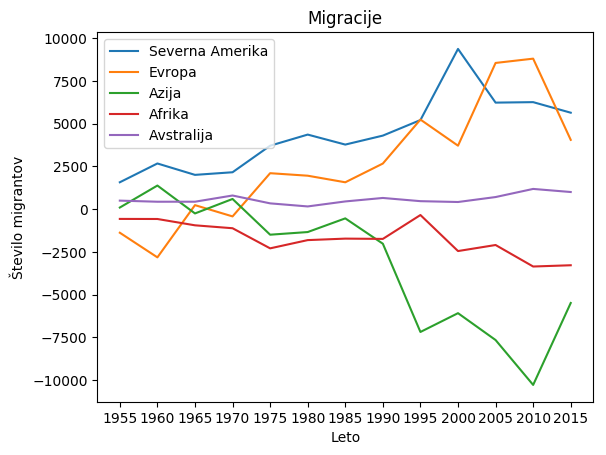

In [107]:
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

filename = "WPP2017_Period_Indicators_Medium.csv"

#-----Tukaj vstavi argument-------
argument = "NetMigrations"
#---------------------------------

region = defaultdict()
def readData(filename):
    dictionary = defaultdict(list)
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        births = row[argument]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary["Europe"].append(float(births))
            elif "Northern America" == row["Location"]:
                dictionary["Northern America"].append(float(births))
            elif "Southern America" == row["Location"]:
                dictionary["Southern America"].append(float(births))
            elif "Asia" == row["Location"]:
                dictionary["Asia"].append(float(births))
            elif "Africa" == row["Location"]:
                dictionary["Africa"].append(float(births))
            elif "Australia/New Zealand" == row["Location"]:
                dictionary["Australia"].append(float(births))
    return dictionary

region = readData(filename)
time_periods = list(range(1955,2016,5))

x = np.array(range(13))
plt.xticks(x, time_periods)

plt.plot(x, np.array(region["Northern America"][:13]), label='Severna Amerika')
plt.plot(x, np.array(region["Europe"][:13]), label='Evropa')
#ax.plot(x, np.array(region["Southern America"][:13]), label='Južna Amerika')
plt.plot(x, np.array(region["Asia"][:13]), label='Azija')
plt.plot(x, np.array(region["Africa"][:13]), label='Afrika')
plt.plot(x, np.array(region["Australia"][:13]), label='Avstralija')

plt.xlabel("Leto")
plt.ylabel("Število migrantov")
plt.title("Migracije")

plt.legend(loc='upper left')

plt.show()